# Polynomial Regression

## Polynomial Regression: extending linear models with basis functions
https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. 

This approach maintains the generally fast performance of linear methods, 
while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing ***polynomial features*** from the coefficients. 

In the standard linear regression case, you might have a model that looks like this for two-dimensional data:
    
$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, 
so that the model looks like this:

$$ \hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: 
to see this, imagine creating a new set of features

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written

$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we considered above 
(i.e. the model is linear in ) and can be solved by the same techniques. 

By considering linear fits within a higher-dimensional space built with these basis functions, 
the model has the flexibility to fit a much broader range of data.

Here is an example of applying this idea to one-dimensional data, using polynomial features of varying degrees:

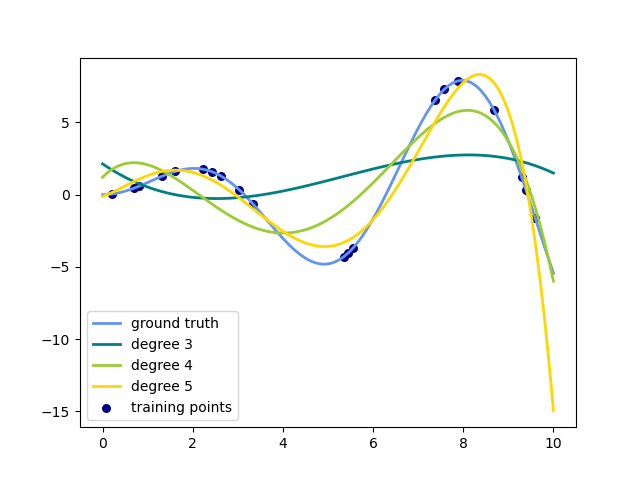

This figure is created using the PolynomialFeatures transformer, 
which transforms an input data matrix into a new data matrix of a given degree. 

It can be used as follows:

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
print('X:')
print(X)
print()
#array([[0, 1],
#       [2, 3],
#       [4, 5]])
poly = PolynomialFeatures(degree=2)
print('poly.fit_transform(X):')
print(poly.fit_transform(X))
#array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#       [ 1.,  2.,  3.,  4.,  6.,  9.],
#       [ 1.,  4.,  5., 16., 20., 25.]])

X:
[[0 1]
 [2 3]
 [4 5]]

poly.fit_transform(X):
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


The features of $X$ have been transformed from $[x_1, x_2]$ to 
$[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$, and can now be used within any linear model.

This sort of preprocessing can be streamlined with the Pipeline tools. 

A single object representing a simple polynomial regression can be created and used as follows:

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
print("model.named_steps['linear'].coef_:")
print(model.named_steps['linear'].coef_)
#array([ 3., -2.,  1., -1.])

model.named_steps['linear'].coef_:
[ 3. -2.  1. -1.]


The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature,
but only the so-called interaction features that multiply together at most $d$ distinct features. 

These can be gotten from PolynomialFeatures with the setting interaction_only=True.

For example, when dealing with boolean features, $x_i^n = x_i$ 
for all $n$ and is therefore useless; but $x_i x_j$ 
represents the conjunction of two booleans. 

This way, we can solve the XOR problem with a linear classifier:

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print('y:')
print(y)
#array([0, 1, 1, 0])
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print('X:')
print(X)
#array([[1, 0, 0, 0],
#       [1, 0, 1, 0],
#       [1, 1, 0, 0],
#       [1, 1, 1, 1]])
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                  shuffle=False).fit(X, y)
print('clf.predict(X):')
print(clf.predict(X))
print()
#array([0, 1, 1, 0])
print('clf.score(X, y):')
print(clf.score(X, y))
#1.0

y:
[0 1 1 0]
X:
[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]
clf.predict(X):
[0 1 1 0]

clf.score(X, y):
1.0


# Example: Plot for Polynomial regression
https://acadgild.com/blog/polynomial-regression-understand-power-of-polynomials

To understand the relationship between the degree of the independent variable and the dependent variable.  

Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive
    
:Median Value (attribute 14) is usually the target

:Attribute Information (in order):

https://nowosad.github.io/spData/reference/boston.html
    
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business (Industry) acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000 * (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: a numeric vector of percentage values of lower status population.
- MEDV Median value of owner-occupied homes in \$1000's

:Missing Attribute Values: None

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


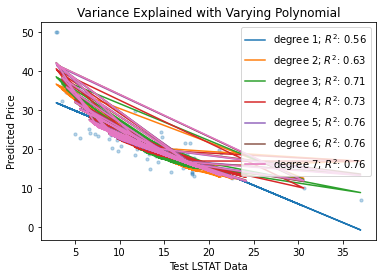

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#
#############################################################################
# Load data
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

#(506, 13) (506,)
#['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']

data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()
#  CRIM    ZN   INDUS CHAS NOX   RM    AGE  DIS    RAD TAX   PTRATIO B      LSTAT MEDV
#0 0.00632 18.0 2.31  0.0  0.538 6.575 65.2 4.0900 1.0 296.0 15.3    396.90 4.98  24.0
#1 0.02731 0.0  7.07  0.0  0.469 6.421 78.9 4.9671 2.0 242.0 17.8    396.90 9.14  21.6
#2 0.02729 0.0  7.07  0.0  0.469 7.185 61.1 4.9671 2.0 242.0 17.8    392.83 4.03  34.7
#3 0.03237 0.0  2.18  0.0  0.458 6.998 45.8 6.0622 3.0 222.0 18.7    394.63 2.94  33.4
#4 0.06905 0.0  2.18  0.0  0.458 7.147 54.2 6.0622 3.0 222.0 18.7    396.90 5.33  36
X = data[['LSTAT']]
y = data['MEDV']
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)
# Polynomial Regression-nth order
plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_training_set,y_training_set)

    y_plot = model.predict(x_test_set)

    plt.plot(x_test_set, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))

plt.legend(loc='upper right')

plt.xlabel("Test LSTAT Data")

plt.ylabel("Predicted Price")

plt.title("Variance Explained with Varying Polynomial")

plt.show()